In [64]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector

Q = QuantumCircuit(4, name="F(x)")

Q.x(0)
Q.x(1)

Q.x(0)
Q.x(1)

Q.ccx(0,1,3)

Q.x(0)
Q.x(1)

Q.x(0)
Q.ccx(0,1,2)
Q.x(0)

Q.x(1)
Q.ccx(0,1,2)
Q.ccx(0,1,3)

Q.x(1)

Q.x(1)
Q.ccx(0,1,2)
Q.ccx(0,1,3)

Q.x(1)

Q.to_gate()

QC = QuantumCircuit(4,4)

QC.h(0)
QC.h(1)

QC.append(Q, [0,1,2,3])

QC.h(0)
QC.h(1)

QC.draw(output="mpl", scale=0.5)

S = Statevector(QC)
S.draw("Latex")

<IPython.core.display.Latex object>

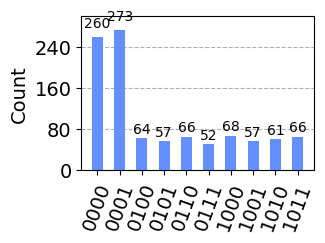

In [65]:
# use local simulator
QC.measure(0,0)
QC.measure(1,1)
QC.measure(2,2)
QC.measure(3,3)

backend = BasicAer.get_backend("qasm_simulator")
# the number of shots is twice the length of the bitstring
shots = 1024
job = execute(QC, backend=backend, shots=shots)
answer = job.result().get_counts()

plot_histogram(answer, figsize=(3,2))